In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
#Extract features
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
#Extract Target
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
#Adding Target variable
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
df.shape

(150, 5)

In [9]:
#splitting main dataframe into 3 target categories
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:150]

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

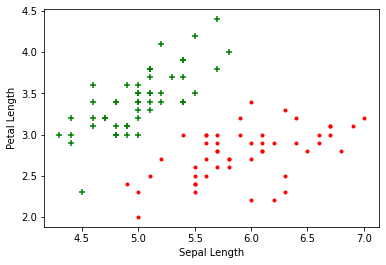

In [12]:
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color = 'green',marker='+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color = 'red',marker='.')

In [13]:
from sklearn.model_selection import train_test_split

In [15]:
X = df.drop(['target'],axis = 'columns')
Y = df.target

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=2)

In [17]:
len(X_train), len(y_train)

(105, 105)

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [22]:
knn.score(X_test,y_test)

0.9777777777777777

In [24]:
#Now lets compute xonfusion metrics
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[17,  0,  0],
       [ 0, 14,  1],
       [ 0,  0, 13]], dtype=int64)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7.5))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.93      0.97        15
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

